# Explore here

In [1]:
# Your code here
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
duplicados = df[df.duplicated()]

duplicados

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
variables = (list(df))

variables

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [8]:
# Objetivo es predecir en base a medidas diagnósticas si un paciente tiene o no diabetes.
# Variable Objetivo = Outcome

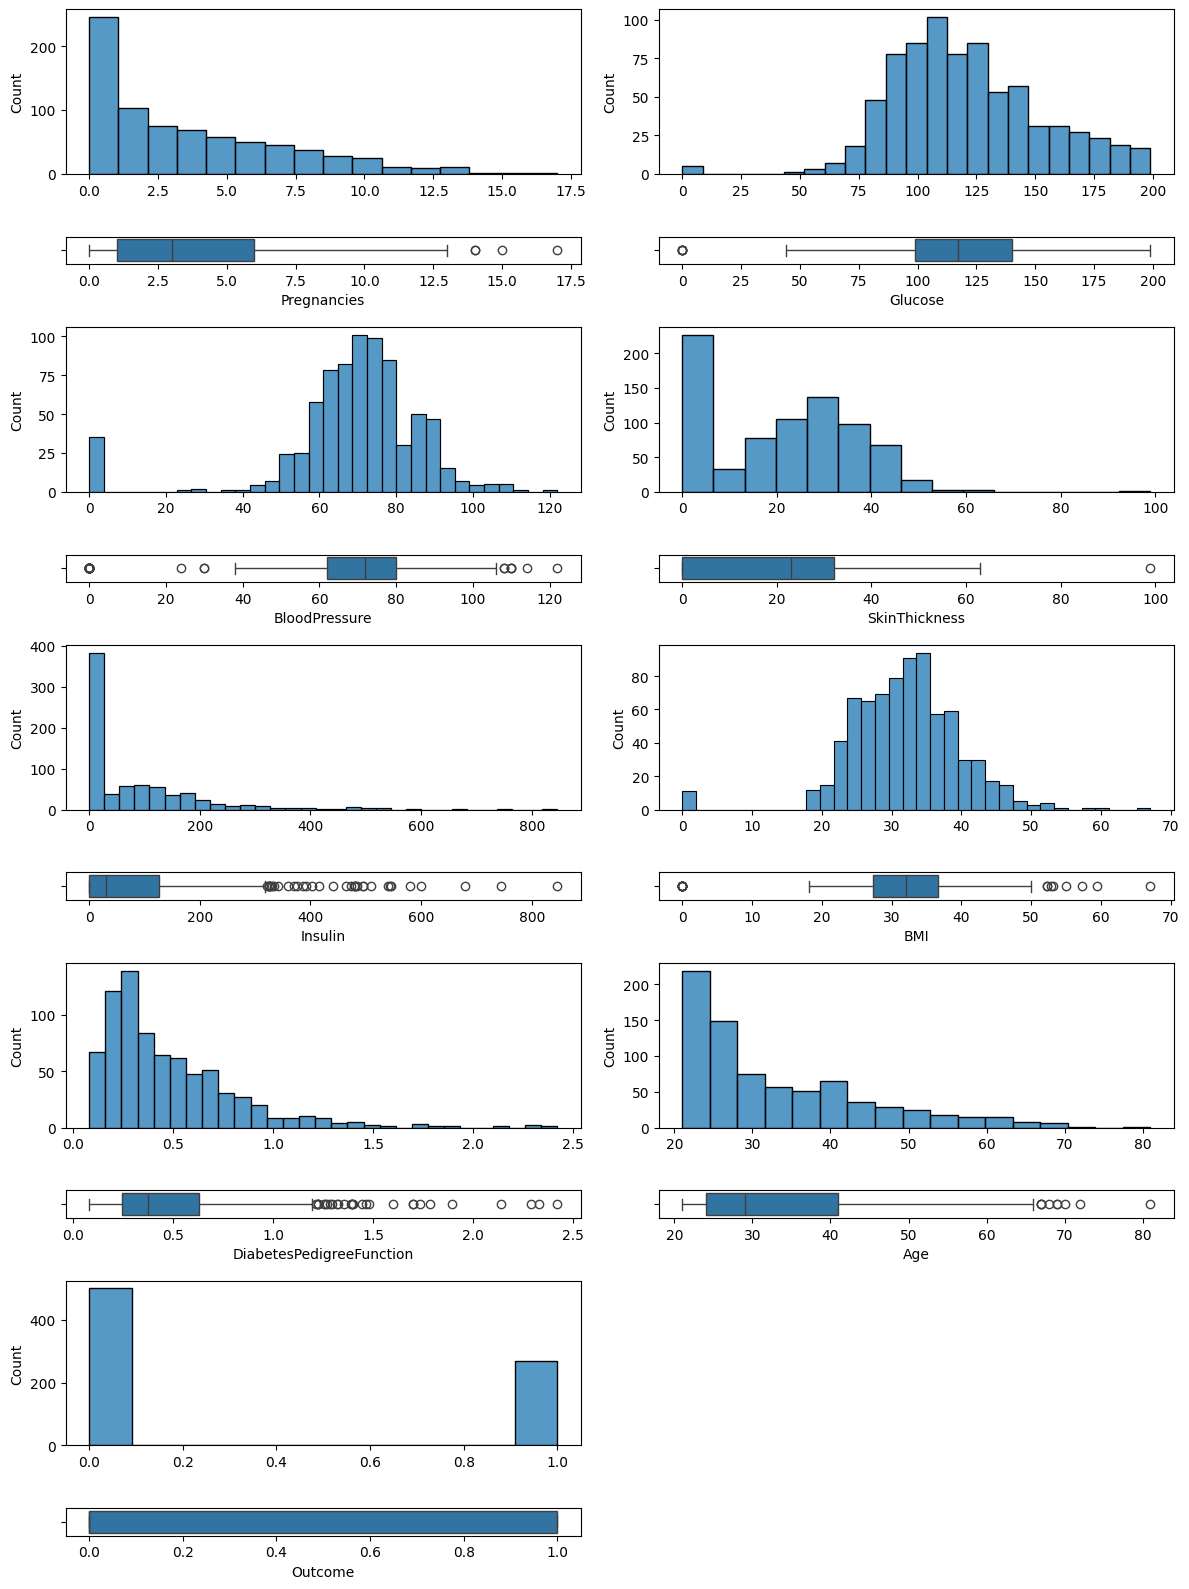

In [9]:
# Hay solo variables númericas. No categoricas
# Analisis univariante númerico

import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(10,2, figsize = (12,16), gridspec_kw = {'height_ratios': [6, 1, 6, 1, 6, 1, 6, 1,6,1]})

sns.histplot(ax = axis[0,0], data = df, x = "Pregnancies").set(xlabel = None)
sns.boxplot(ax = axis[1,0],data = df, x = "Pregnancies")

sns.histplot(ax = axis[0,1], data = df, x = "Glucose").set(xlabel = None)
sns.boxplot(ax = axis[1,1],data = df, x = "Glucose")

sns.histplot(ax = axis[2,0], data = df, x = "BloodPressure").set(xlabel = None)
sns.boxplot(ax = axis[3,0],data = df, x = "BloodPressure")

sns.histplot(ax = axis[2,1], data = df, x = "SkinThickness").set(xlabel = None)
sns.boxplot(ax = axis[3,1],data = df, x = "SkinThickness")

sns.histplot(ax = axis[4,0], data = df, x = "Insulin").set(xlabel = None)
sns.boxplot(ax = axis[5,0],data = df, x = "Insulin")

sns.histplot(ax = axis[4,1], data = df, x = "BMI").set(xlabel = None)
sns.boxplot(ax = axis[5,1],data = df, x = "BMI")

sns.histplot(ax = axis[6,0], data = df, x = "DiabetesPedigreeFunction").set(xlabel = None)
sns.boxplot(ax = axis[7,0],data = df, x = "DiabetesPedigreeFunction")

sns.histplot(ax = axis[6,1], data = df, x = "Age").set(xlabel = None)
sns.boxplot(ax = axis[7,1],data = df, x = "Age")

sns.histplot(ax = axis[8,0], data = df, x = "Outcome").set(xlabel = None)
sns.boxplot(ax = axis[9,0],data = df, x = "Outcome")

fig.delaxes(axis[8, 1])
fig.delaxes(axis[9, 1])

plt.tight_layout()

plt.show()

In [10]:
# La mayoría de las pacientes tiene entre 0 y 2 embarazos
# La glucosa se distribuye principalmente entre 80 y 150 mg/dL, siendo la concentración más común alrededor de los 100 mg/dL
# la presion arterial tiene una distribucion normal, salvo algunos outliers. Media al rededor de 100
# Grosor del pliegue cutáneo del tríceps. hay que revisar por que hay tantos en 0.
# hay que revisar los datos de las insulina, por que hay tantos en 0


In [11]:
variables = (list(df))

variables

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

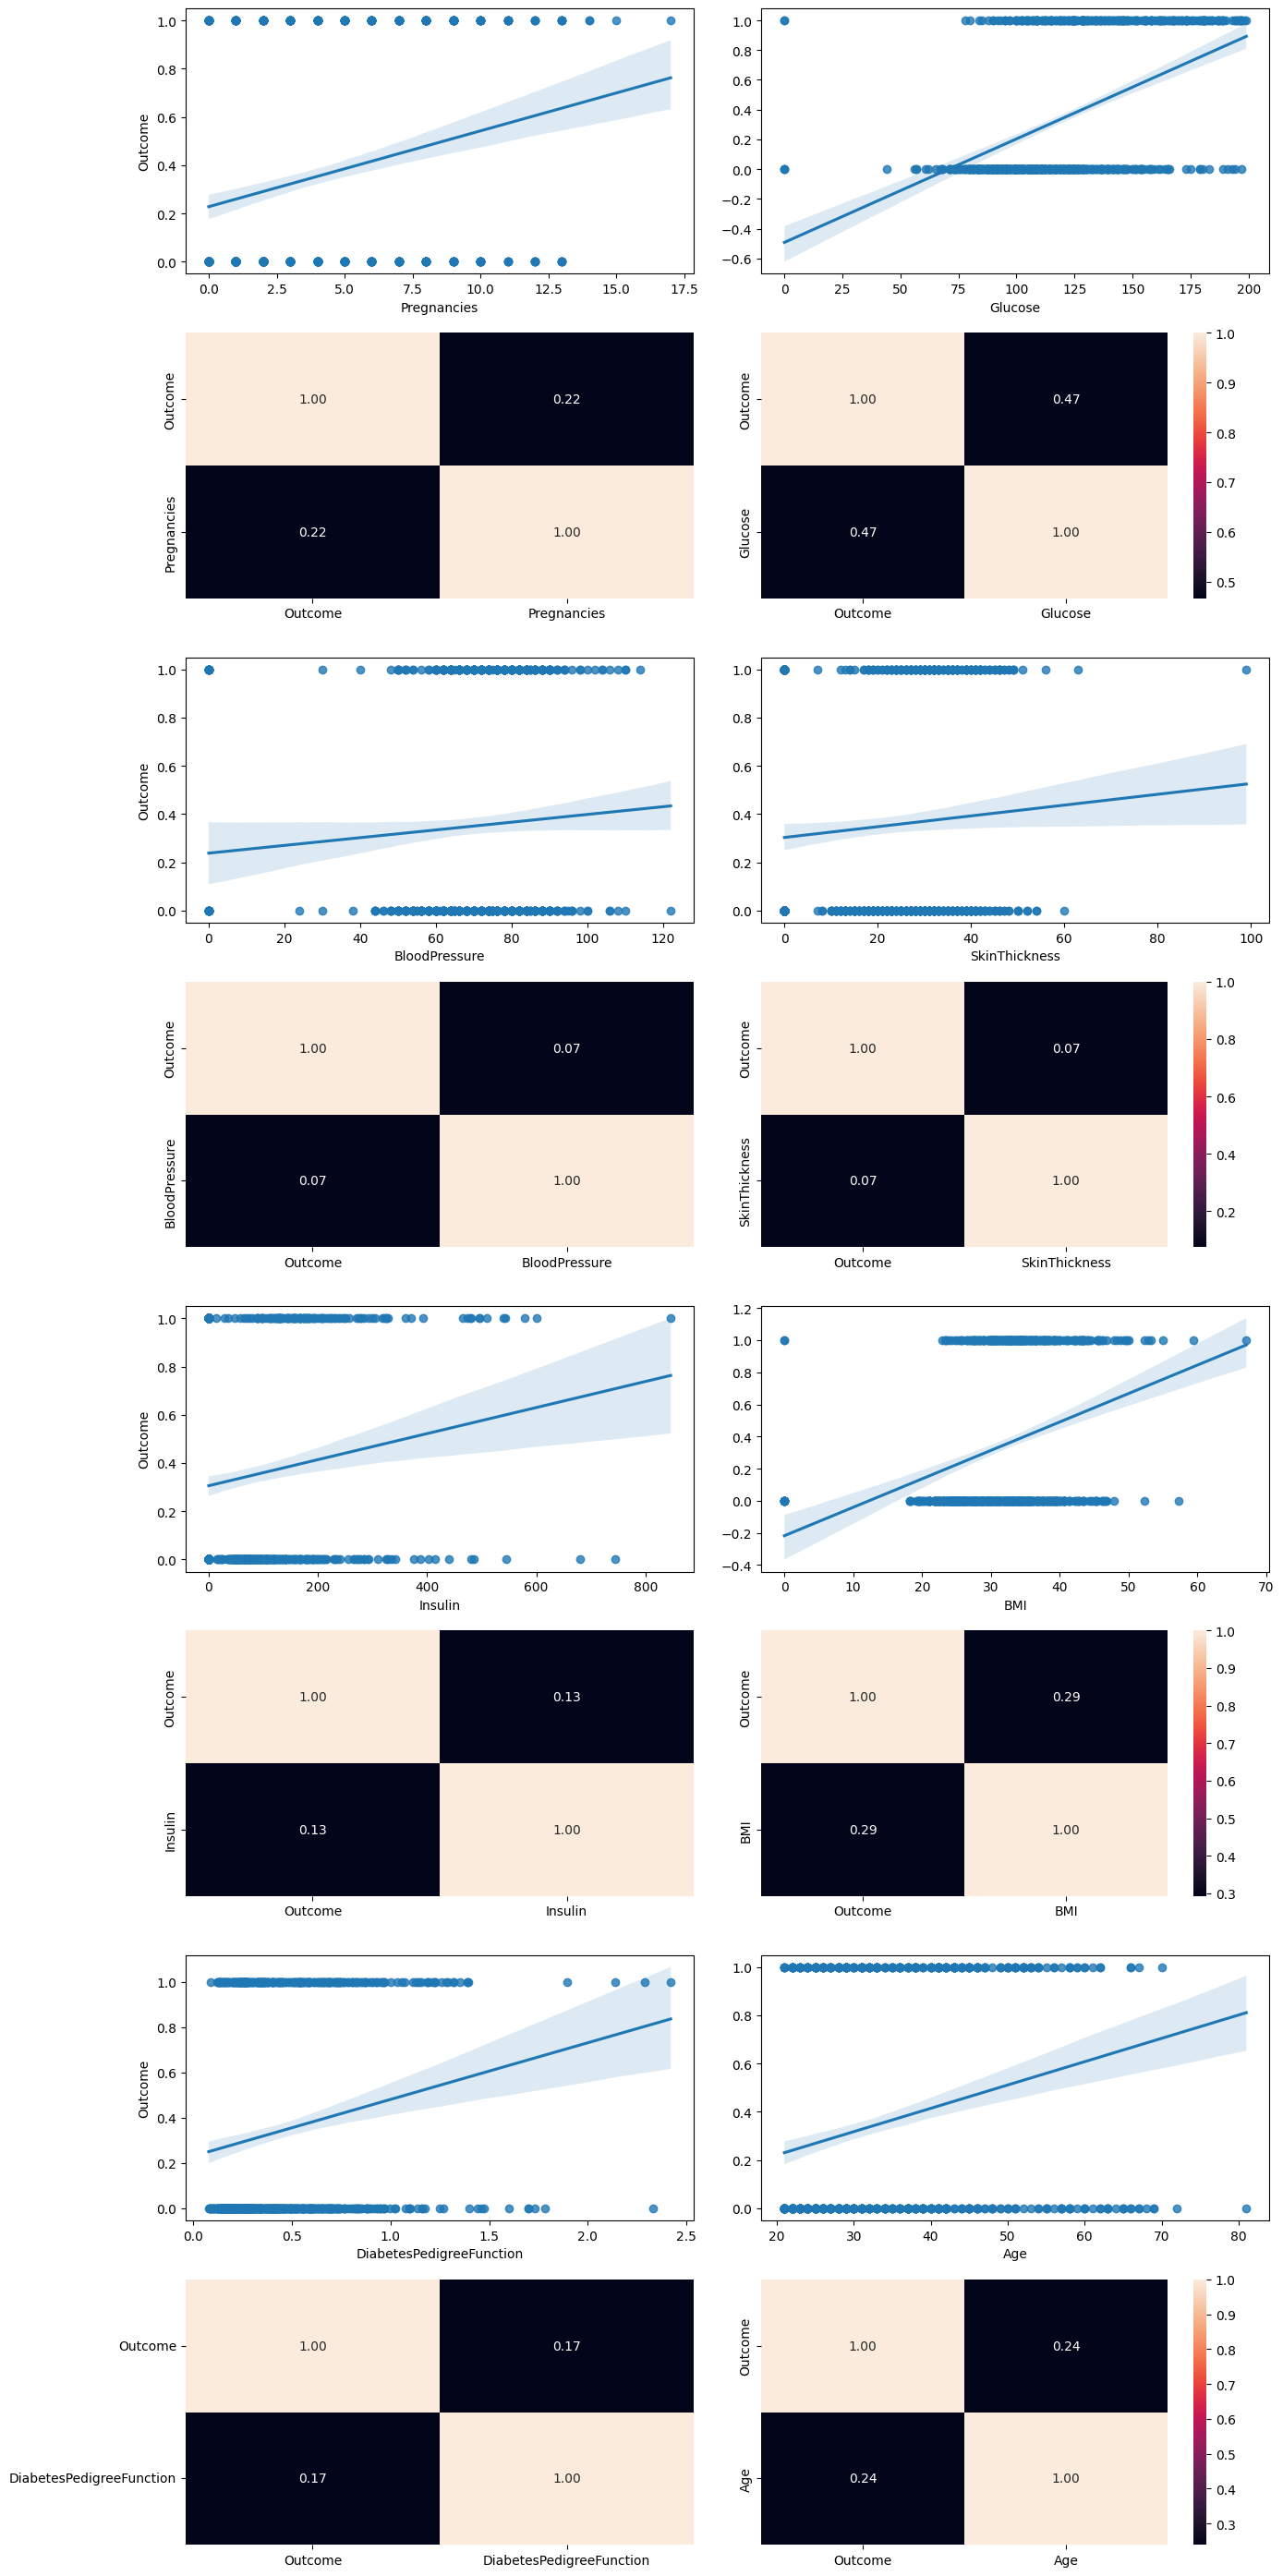

In [12]:
# Analisis numerico-numerico

fig, axis = plt.subplots(8, 2, figsize = (14, 28))

sns.regplot(ax = axis[0, 0], data = df, x = "Pregnancies", y = "Outcome")
sns.heatmap(df[["Outcome", "Pregnancies"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "Glucose", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Glucose"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "BloodPressure", y = "Outcome")
sns.heatmap(df[["Outcome", "BloodPressure"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(ax = axis[2, 1], data = df, x = "SkinThickness", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "SkinThickness"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])

sns.regplot(ax = axis[4, 0], data = df, x = "Insulin", y = "Outcome")
sns.heatmap(df[["Outcome", "Insulin"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 0], cbar = False)

sns.regplot(ax = axis[4, 1], data = df, x = "BMI", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "BMI"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1])

sns.regplot(ax = axis[6, 0], data = df, x = "DiabetesPedigreeFunction", y = "Outcome")
sns.heatmap(df[["Outcome", "DiabetesPedigreeFunction"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 0], cbar = False)

sns.regplot(ax = axis[6, 1], data = df, x = "Age", y = "Outcome").set(ylabel=None)
sns.heatmap(df[["Outcome", "Age"]].corr(), annot = True, fmt = ".2f", ax = axis[7, 1])

plt.tight_layout()

plt.show()

In [13]:
# Las variables con mayor correlación son Glucosa y BMI, lo que sugiere que los niveles de glucosa y el índice de masa corporal son buenos predictores.
# Presión Arterial, Grosor de la Piel y Insulina tienen correlaciones muy bajas, lo que indica que no tienen una fuerte relación con el Outcome.
# La Edad y el Número de Embarazos también tienen alguna influencia, pero no tan fuerte como la Glucosa y el BMI.

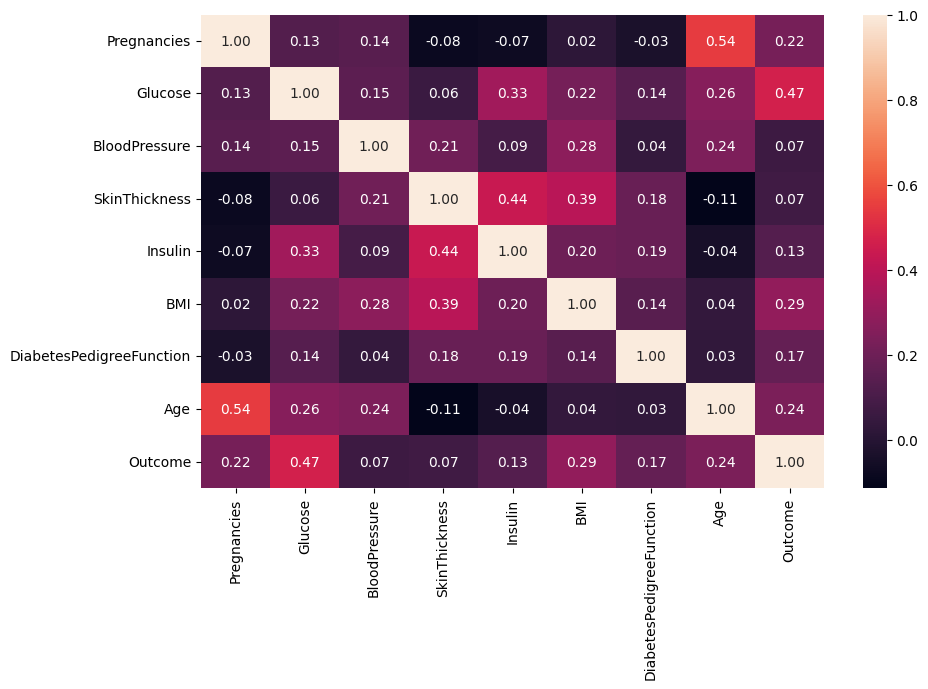

In [ ]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(df[["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

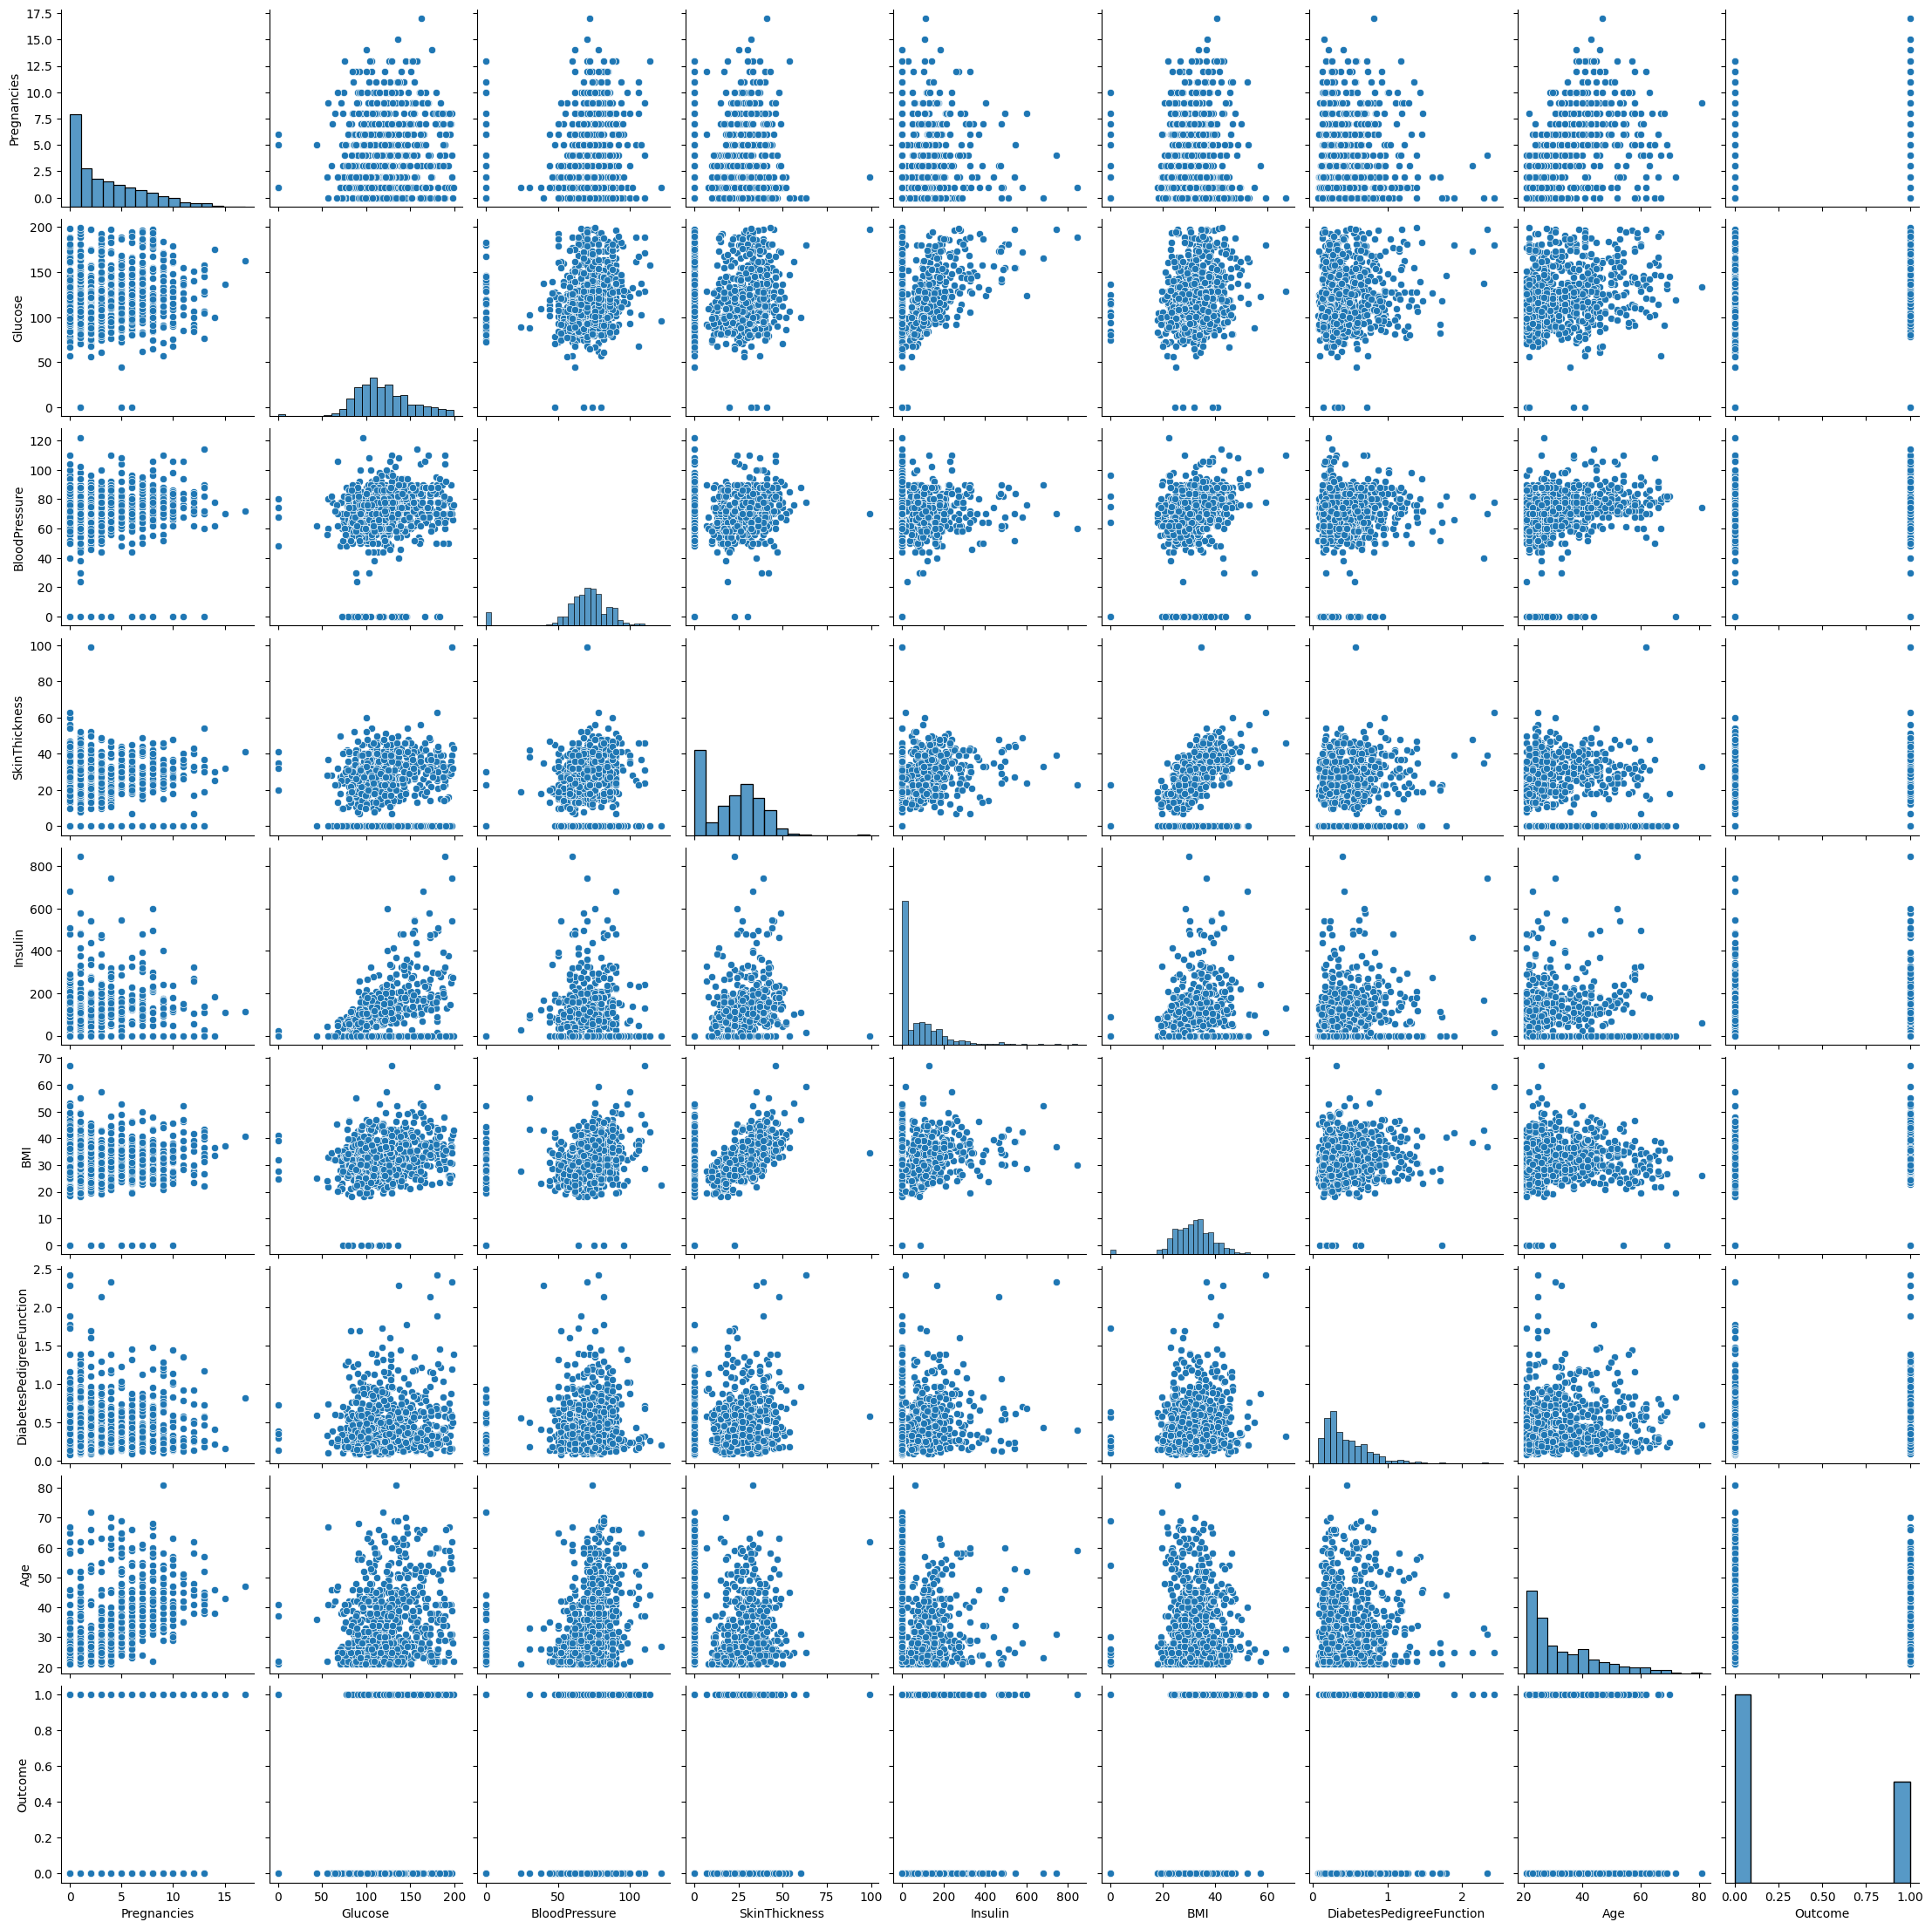

In [15]:
sns.pairplot(data = df)

In [16]:
#Outliers

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


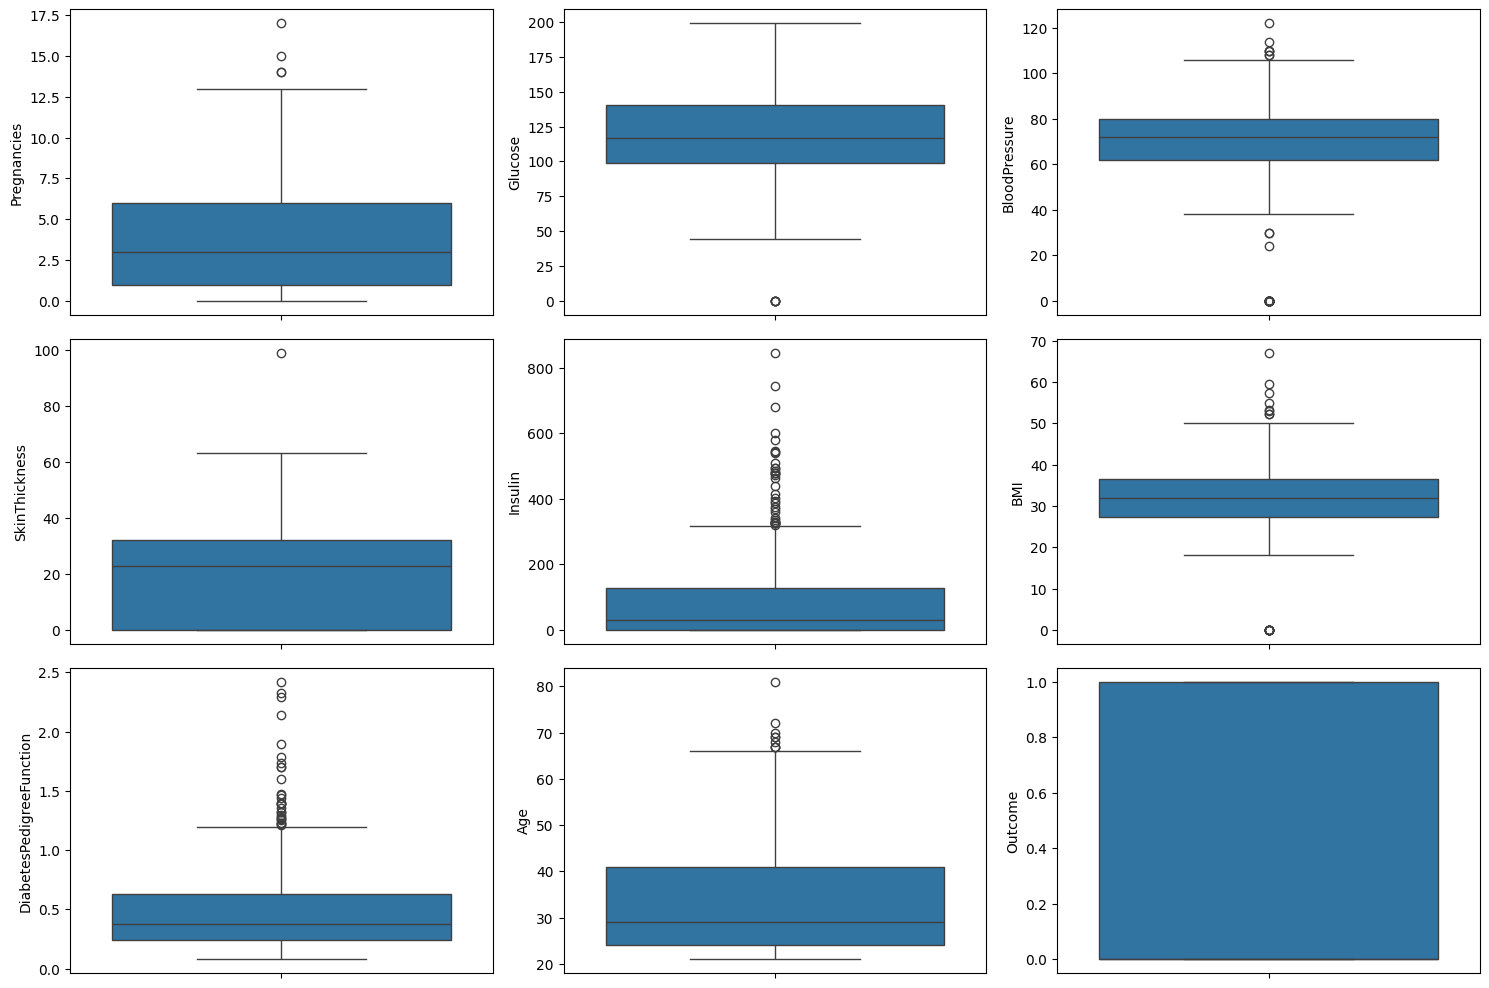

In [17]:
fig, axis = plt.subplots(3, 3, figsize = (15, 10))

sns.boxplot(ax = axis[0, 0], data = df, y = "Pregnancies")
sns.boxplot(ax = axis[0, 1], data = df, y = "Glucose")
sns.boxplot(ax = axis[0, 2], data = df, y = "BloodPressure")
sns.boxplot(ax = axis[1, 0], data = df, y = "SkinThickness")
sns.boxplot(ax = axis[1, 1], data = df, y = "Insulin")
sns.boxplot(ax = axis[1, 2], data = df, y = "BMI")
sns.boxplot(ax = axis[2, 0], data = df, y = "DiabetesPedigreeFunction")
sns.boxplot(ax = axis[2, 1], data = df, y = "Age")
sns.boxplot(ax = axis[2, 2], data = df, y = "Outcome")

plt.tight_layout()

plt.show()

In [18]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
#revisar primero por que hay tantos valores 0 en la insulina
import utils as ut


In [20]:
estadisticas_insulina = ut.analisis_ric('Insulin',df)

superior 318.125 e inferior -190.875


In [21]:
df[df["Insulin"] == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
df[df["Insulin"] == 0].count()

Pregnancies                 374
Glucose                     374
BloodPressure               374
SkinThickness               374
Insulin                     374
BMI                         374
DiabetesPedigreeFunction    374
Age                         374
Outcome                     374
dtype: int64

In [23]:
import numpy as np

df.replace({'Insulin': {0: np.nan}}, inplace=True)

In [24]:
df[df["Insulin"] == 0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [25]:
df.isnull().sum().sort_values(ascending=False)

Insulin                     374
Pregnancies                   0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

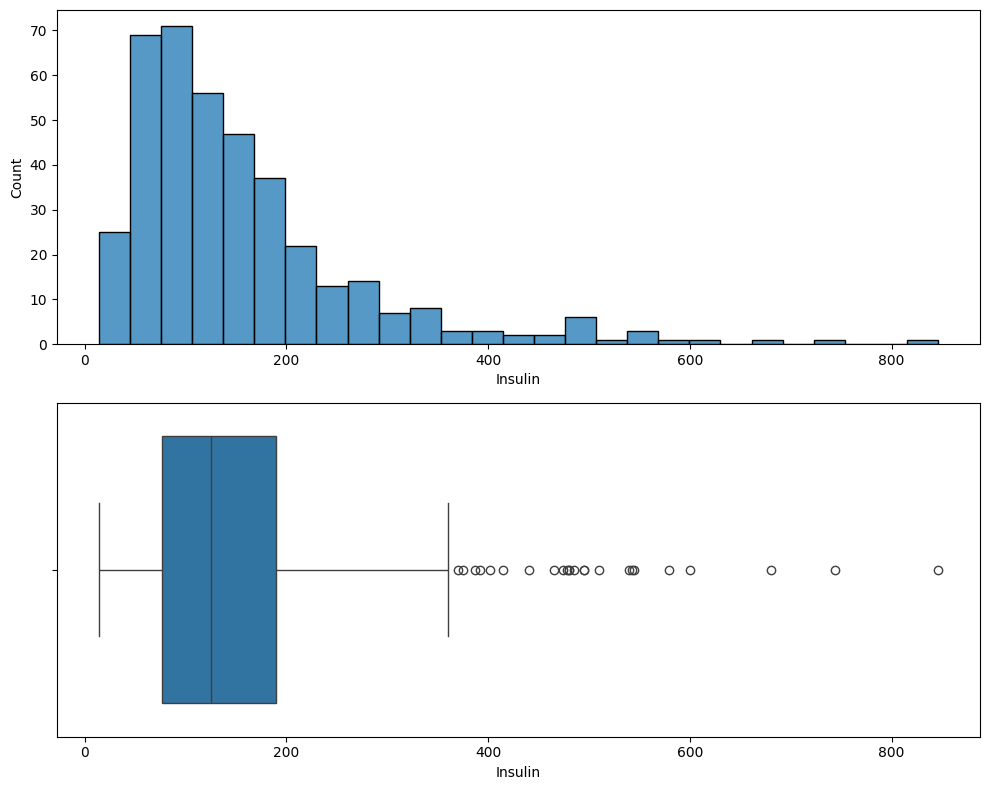

In [26]:
fig, axis = plt.subplots(2, 1, figsize=(10, 8))

sns.histplot(ax=axis[0], data=df, x="Insulin").set(xlabel="Insulin")

sns.boxplot(ax=axis[1], data=df, x="Insulin")


plt.tight_layout()
plt.show()

In [27]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,394.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,155.548223,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,118.775855,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [28]:
df["Insulin"].fillna(df["Insulin"].median(), inplace = True)

/tmp/ipykernel_1031/1644440855.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Insulin"].fillna(df["Insulin"].median(), inplace = True)


In [29]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [30]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,140.671875,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,86.383060,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,121.500000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [31]:
# outliers insulina

df['Insulin'].describe()

count    768.000000
mean     140.671875
std       86.383060
min       14.000000
25%      121.500000
50%      125.000000
75%      127.250000
max      846.000000
Name: Insulin, dtype: float64

In [32]:
estadisticas_insulina = ut.analisis_ric('Insulin',df)

superior 135.875 e inferior 112.875


In [35]:
df[df["Insulin"] > 135.875 ].count()

Pregnancies                 173
Glucose                     173
BloodPressure               173
SkinThickness               173
Insulin                     173
BMI                         173
DiabetesPedigreeFunction    173
Age                         173
Outcome                     173
dtype: int64

In [38]:
df[df["Insulin"] > 300 ]

# en estos caso extremos donde la insulina esta muy elevada, se puede ver que hay resultados de diabete positivos y negativos. se decide mantener estos ouliers.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543.0,30.5,0.158,53,1
13,1,189,60,23,846.0,30.1,0.398,59,1
54,7,150,66,42,342.0,34.7,0.718,42,0
56,7,187,68,39,304.0,37.7,0.254,41,1
111,8,155,62,26,495.0,34.0,0.543,46,1
139,5,105,72,29,325.0,36.9,0.159,28,0
153,1,153,82,42,485.0,40.6,0.687,23,0
186,8,181,68,36,495.0,30.1,0.615,60,1
199,4,148,60,27,318.0,30.9,0.150,29,1
220,0,177,60,29,478.0,34.6,1.072,21,1


In [39]:
# El grosor del pliegue cutáneo del tríceps medido en milímetros (mm) no puede ser 0 en condiciones normales. Esta medida se utiliza para evaluar la cantidad de grasa subcutánea en el cuerpo, y un valor de 0 implicaría la ausencia total de grasa en esa área, lo cual es anatómicamente imposible

df['SkinThickness'].describe()

count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [43]:
df[df["SkinThickness"] == 0].count()

Pregnancies                 227
Glucose                     227
BloodPressure               227
SkinThickness               227
Insulin                     227
BMI                         227
DiabetesPedigreeFunction    227
Age                         227
Outcome                     227
dtype: int64

In [44]:
df.replace({'SkinThickness': {0: np.nan}}, inplace=True)

In [45]:
df.isnull().sum().sort_values(ascending=False)

SkinThickness               227
Pregnancies                   0
Glucose                       0
BloodPressure                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [46]:
df['SkinThickness'].describe()

count    541.000000
mean      29.153420
std       10.476982
min        7.000000
25%       22.000000
50%       29.000000
75%       36.000000
max       99.000000
Name: SkinThickness, dtype: float64

In [47]:
# Si revisamos el gráfico univariante de skinthickness, sin considerar los 0, se puede ver una distribución normal, por lo tanto datos están simétricamente distribuidos
# Por lo tanto la mejor es transformar los nulos a la mediana.

df["SkinThickness"].fillna(df["SkinThickness"].median(), inplace = True)


/tmp/ipykernel_1031/1344607635.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["SkinThickness"].fillna(df["SkinThickness"].median(), inplace = True)


In [48]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
estadisticas_SkinThickness = ut.analisis_ric('SkinThickness',df)

superior 42.5 e inferior 14.5


In [52]:
df[df["SkinThickness"] > 42.5 ].count()

Pregnancies                 48
Glucose                     48
BloodPressure               48
SkinThickness               48
Insulin                     48
BMI                         48
DiabetesPedigreeFunction    48
Age                         48
Outcome                     48
dtype: int64

In [57]:
df[df["SkinThickness"] > 42.5 ].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45.0,543.0,30.5,0.158,53,1
16,0,118,84,47.0,230.0,45.8,0.551,31,1
39,4,111,72,47.0,207.0,37.1,1.390,56,1
57,0,100,88,60.0,110.0,46.8,0.962,31,0
86,13,106,72,54.0,125.0,36.6,0.178,45,0


In [63]:
df[df["BMI"] == 0].count()

Pregnancies                 11
Glucose                     11
BloodPressure               11
SkinThickness               11
Insulin                     11
BMI                         11
DiabetesPedigreeFunction    11
Age                         11
Outcome                     11
dtype: int64

In [64]:
df[df["Glucose"] == 0].count()

Pregnancies                 5
Glucose                     5
BloodPressure               5
SkinThickness               5
Insulin                     5
BMI                         5
DiabetesPedigreeFunction    5
Age                         5
Outcome                     5
dtype: int64

In [79]:
df.replace({'BMI': {0: np.nan}}, inplace=True)
df.replace({'Glucose': {0: np.nan}}, inplace=True)

In [80]:
df["BMI"].fillna(df["BMI"].median(), inplace = True)
df["Glucose"].fillna(df["Glucose"].median(), inplace = True)


/tmp/ipykernel_1031/2484552104.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["BMI"].fillna(df["BMI"].median(), inplace = True)
/tmp/ipykernel_1031/2484552104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

In [81]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [82]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,69.105469,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,19.355807,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,0.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,62.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [83]:
estadisticas_glucosa = ut.analisis_ric('Glucose',df)

superior 201.0 e inferior 39.0


In [84]:
df[df["Glucose"] > 201.0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [86]:
df[df["Glucose"] < 39.0].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [87]:
estadisticas_BMI = ut.analisis_ric('BMI',df)

superior 50.25 e inferior 13.849999999999998


In [90]:
df[df["BMI"] > 50.550000000000004].count()

Pregnancies                 8
Glucose                     8
BloodPressure               8
SkinThickness               8
Insulin                     8
BMI                         8
DiabetesPedigreeFunction    8
Age                         8
Outcome                     8
dtype: int64

In [92]:
df[df["BMI"] > 50.550000000000004]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76,56.0,100.0,53.2,0.759,25,1
125,1,88.0,30,42.0,99.0,55.0,0.496,26,1
177,0,129.0,110,46.0,130.0,67.1,0.319,26,1
193,11,135.0,0,29.0,125.0,52.3,0.578,40,1
247,0,165.0,90,33.0,680.0,52.3,0.427,23,0
303,5,115.0,98,29.0,125.0,52.9,0.209,28,1
445,0,180.0,78,63.0,14.0,59.4,2.420,25,1
673,3,123.0,100,35.0,240.0,57.3,0.880,22,0


In [93]:
df[df["BMI"] < 13.849999999999998].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# No es necesario escalar las variables

